<p style="background-color:lightgreen;font-family:newtimeroman;font-size:30px;line-height:1.7em;text-align:center;border-radius:5px 5px">House Price Estimation Using Artificial Neural Network for Regression Analysis</p>

___VENKATESH MUNGI___ venkateshmungi1247@gmail.com

<img src ='https://wallpaperaccess.com/full/1126753.jpg'>

In [1]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C://PYTHON//AI_ML//Deep_Learning//kc_house.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3421079032,20150217T000000,75000.0,1,0.00,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
1,40000362,20140506T000000,78000.0,2,1.00,780,16344,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387
2,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
3,3028200080,20150324T000000,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
4,3883800011,20141105T000000,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
21609,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
21610,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
21611,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449


___Column Defintions___

id - Unique ID for each home sold

date - Date of the home sale

price - Price of each home sold

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

sqft_living - Square footage of the apartments interior living space

sqft_lot - Square footage of the land space

floors - Number of floors

waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not

view - An index from 0 to 4 of how good the view of the property was

condition - An index from 1 to 5 on the condition of the apartment,

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction 

and design, and 11-13 have a high quality level of construction and design.

sqft_above - The square footage of the interior housing space that is above ground level

sqft_basement - The square footage of the interior housing space that is below ground level

yr_built - The year the house was initially built

yr_renovated - The year of the house’s last renovation

zipcode - What zipcode area the house is in

lat - Lattitude

long - Longitude

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [3]:
# Checking for Duplicate Records
df.duplicated().sum()

0

___Delete Unwanted Coloumns___

- Some times some attributes from dataframe are not usefull at all to analyse data. For example "id" column in dataframe not usefull to estimate price of the house in our dataframe. So, i want to delete this type of columns from dataframe, those are : 'id', 'date', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'

In [4]:
df1 = df.drop(['id', 'date', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'], axis=1)
df1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,75000.0,1,0.00,670,43377,1.0,0,0,3,3,670,0,1160,42882
1,78000.0,2,1.00,780,16344,1.0,0,0,1,5,780,0,1700,10387
2,80000.0,1,0.75,430,5050,1.0,0,0,2,4,430,0,1200,7500
3,81000.0,2,1.00,730,9975,1.0,0,0,1,5,730,0,860,9000
4,82000.0,3,1.00,860,10426,1.0,0,0,3,6,860,0,1140,11250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,4600,21750
21609,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,3560,24345
21610,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,4540,42730
21611,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,3930,25449


- Now my columns reduced to 14 from 21.

<p style="background-color:lightpink;font-family:newtimeroman;font-size:20px;line-height:1.7em;text-align:center;border-radius:5px 5px">Descriptive Analysis of Data</p>

In [5]:
# Meta data Information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  sqft_living15  21613 non-null  int64  
 13  sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.3 MB


In [6]:
df1.describe().T.style.set_properties(**{'background-color': 'violet','color': 'black','border-color': 'red'})

,count,mean,std,min,25%,50%,75%,max
price,21613.000000,540088.141767,367127.196483,75000.000000,321950.000000,450000.000000,645000.000000,7700000.000000
bedrooms,21613.000000,3.370842,0.930062,0.000000,3.000000,3.000000,4.000000,33.000000
bathrooms,21613.000000,2.114757,0.770163,0.000000,1.750000,2.250000,2.500000,8.000000
sqft_living,21613.000000,2079.899736,918.440897,290.000000,1427.000000,1910.000000,2550.000000,13540.000000
sqft_lot,21613.000000,15106.967566,41420.511515,520.000000,5040.000000,7618.000000,10688.000000,1651359.000000
floors,21613.000000,1.494309,0.539989,1.000000,1.000000,1.500000,2.000000,3.500000
waterfront,21613.000000,0.007542,0.086517,0.000000,0.000000,0.000000,0.000000,1.000000
view,21613.000000,0.234303,0.766318,0.000000,0.000000,0.000000,0.000000,4.000000
condition,21613.000000,3.409430,0.650743,1.000000,3.000000,3.000000,4.000000,5.000000
grade,21613.000000,7.656873,1.175459,1.000000,7.000000,7.000000,8.000000,13.000000


In [7]:
# Checking For Null Values
df1.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
bed = df1.bedrooms.value_counts()
bed

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

- Now we can see the different number of bedrooms and their count in our dataframe.

In [9]:
df1[['bedrooms','price','condition']].groupby(['bedrooms','condition']).agg(['mean','count'])

price      
                            mean count
bedrooms condition                    
0        1          1.420000e+05     1
         2          2.280000e+05     1
         3          4.813600e+05    10
         4          1.399500e+05     1
1        1          2.855000e+05     4
         2          2.450000e+05    11
         3          3.135745e+05   124
         4          3.480948e+05    48
         5          3.151792e+05    12
2        1          2.772917e+05    12
         2          2.759067e+05    51
         3          4.012794e+05  1779
         4          4.059846e+05   718
         5          4.250840e+05   200
3        1          4.007438e+05     8
         2          2.963365e+05    69
         3          4.671847e+05  6308
         4          4.543136e+05  2711
         5          5.191837e+05   728
4        1          4.457500e+05     4
         2          4.733883e+05    36
         3          6.335218e+05  4580
         4          6.159941e+05  1682
         5          7.181036e+05   580
5        2          2.355000e+05     1
         3          8.130543e+05  1031
         4          7.080780e+05   418
         5          8.269887e+05   151
6        1          4.325000e+05     1
         2          5.248167e+05     3
         3          7.866955e+05   158
         4          8.747552e+05    87
         5          9.623078e+05    23
7        3          9.179944e+05    25
         4          8.505730e+05     9
         5          1.385000e+06     4
8        3          7.920000e+05     8
         4          9.200000e+05     3
         5          2.635000e+06     2
9        3          8.939998e+05     6
10       3          1.148000e+06     1
         4          6.550000e+05     2
11       3          5.200000e+05     1
33       5          6.400000e+05     1

In [10]:
# To Know the categories of feature "condition"
con = df1.condition.value_counts()
con

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

- condition: - An index from 1 to 5 on the condition of the apartment,

In [11]:
# To Know the categories of feature "floors"
fl = df1.floors.value_counts()
fl

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [12]:
# To Know the categories of feature "grade"
fl = df1.grade.value_counts()
fl

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

- grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction

and design, and 11-13 have a high quality level of construction and design.

In [13]:
bath = df1.bathrooms.value_counts()
bath

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
5.50      10
0.00      10
1.25       9
6.00       6
5.75       4
0.50       4
6.75       2
6.50       2
8.00       2
6.25       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

- bathrooms: - count of bathrooms with rank , where .5 accounts for a room with a toilet but no shower

In [14]:
view = df1.view.value_counts()
view

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

- view: - An index from 0 to 4 of how good the view of the property was

<p style="background-color:lightpink;font-family:newtimeroman;font-size:20px;line-height:1.7em;text-align:center;border-radius:5px 5px">Visual Analysis of Data</p>

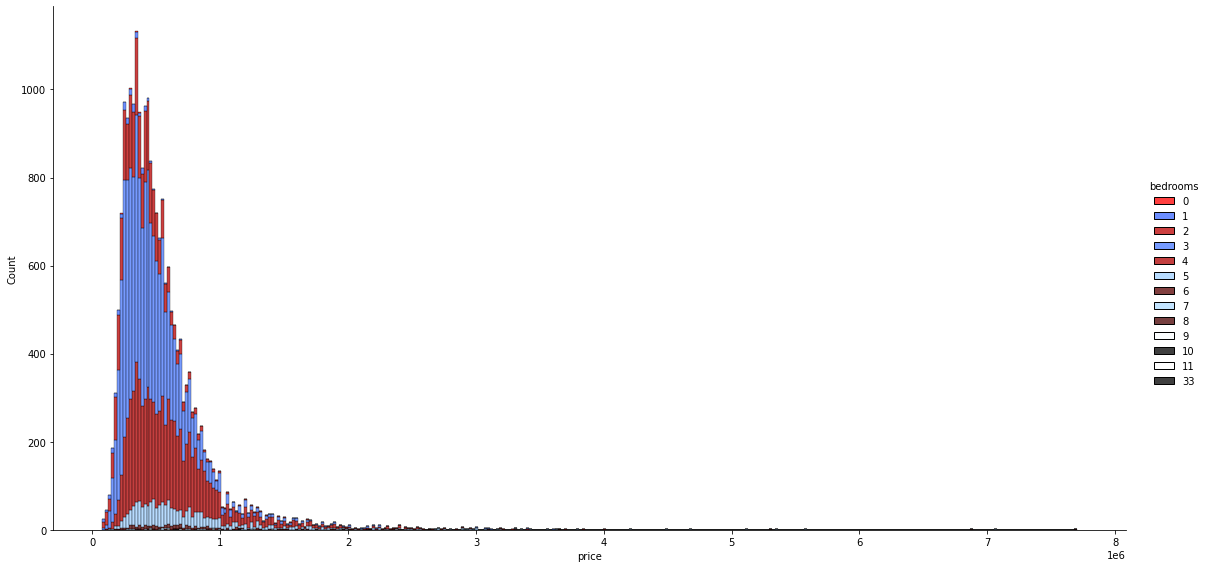

In [15]:
sns.displot(data=df1, x="price", hue="bedrooms", multiple="stack", palette = "flag", height = 8, aspect = 2)

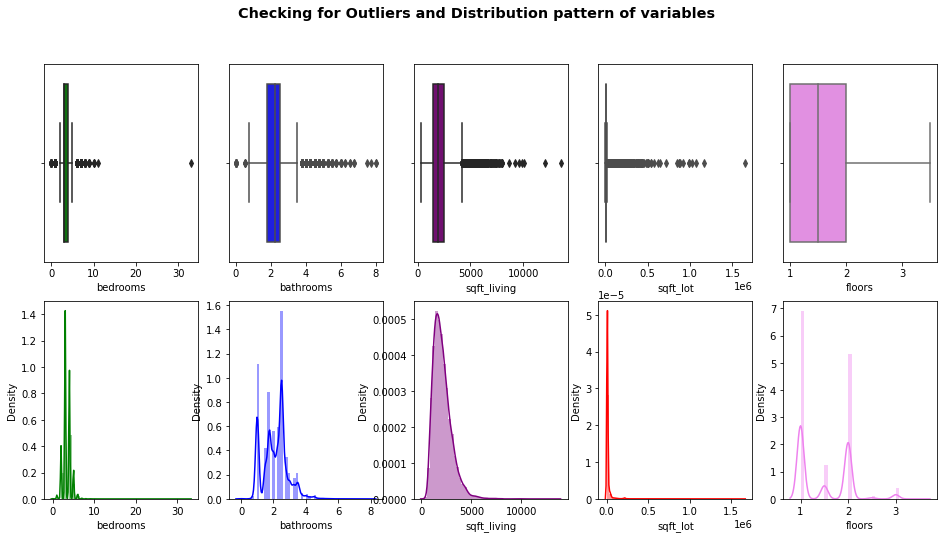

In [16]:
plt.figure(figsize = (16,8))
plt.suptitle("Checking for Outliers and Distribution pattern of variables", fontsize = 'x-large',weight = 'extra bold',ha = "center")
plt.subplot(2,5,1)
sns.boxplot(df1['bedrooms'], color = 'green')
plt.subplot(2,5,2)
sns.boxplot(df1['bathrooms'], color = 'blue')
plt.subplot(2,5,3)
sns.boxplot(df1['sqft_living'], color = 'purple')
plt.subplot(2,5,4)
sns.boxplot(df1['sqft_lot'], color = 'red')
plt.subplot(2,5,5)
sns.boxplot(df1['floors'], color = 'violet')
plt.subplot(2,5,6)
sns.distplot(df1['bedrooms'], color = 'green')
plt.subplot(2,5,7)
sns.distplot(df1['bathrooms'], color = 'blue')
plt.subplot(2,5,8)
sns.distplot(df1['sqft_living'], color = 'purple')
plt.subplot(2,5,9)
sns.distplot(df1['sqft_lot'], color = 'red')
plt.subplot(2,5,10)
sns.distplot(df1['floors'], color = 'violet')
plt.show()

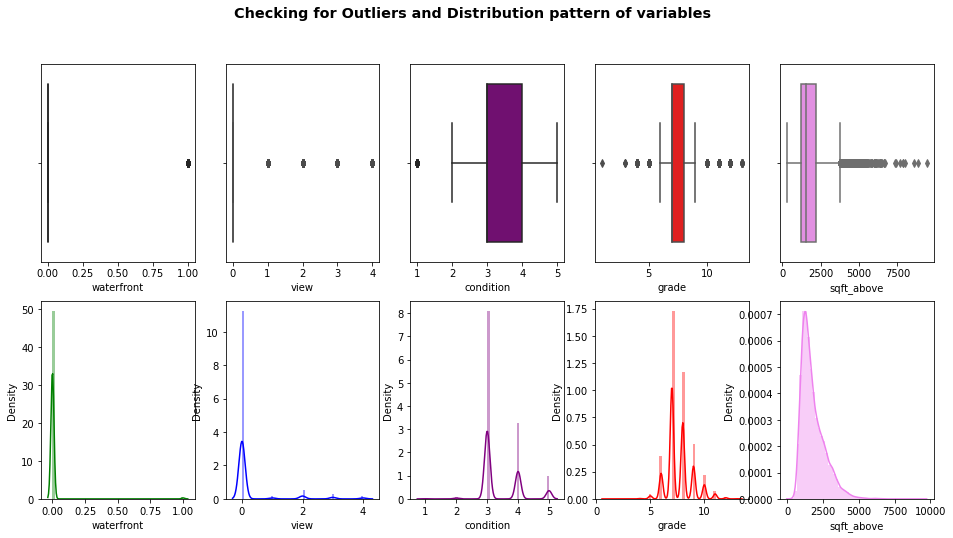

In [17]:
plt.figure(figsize = (16,8))
plt.suptitle("Checking for Outliers and Distribution pattern of variables", fontsize = 'x-large',weight = 'extra bold',ha = "center")
plt.subplot(2,5,1)
sns.boxplot(df1['waterfront'], color = 'green')
plt.subplot(2,5,2)
sns.boxplot(df1['view'], color = 'blue')
plt.subplot(2,5,3)
sns.boxplot(df1['condition'], color = 'purple')
plt.subplot(2,5,4)
sns.boxplot(df1['grade'], color = 'red')
plt.subplot(2,5,5)
sns.boxplot(df1['sqft_above'], color = 'violet')
plt.subplot(2,5,6)
sns.distplot(df1['waterfront'], color = 'green')
plt.subplot(2,5,7)
sns.distplot(df1['view'], color = 'blue')
plt.subplot(2,5,8)
sns.distplot(df1['condition'], color = 'purple')
plt.subplot(2,5,9)
sns.distplot(df1['grade'], color = 'red')
plt.subplot(2,5,10)
sns.distplot(df1['sqft_above'], color = 'violet')
plt.show()

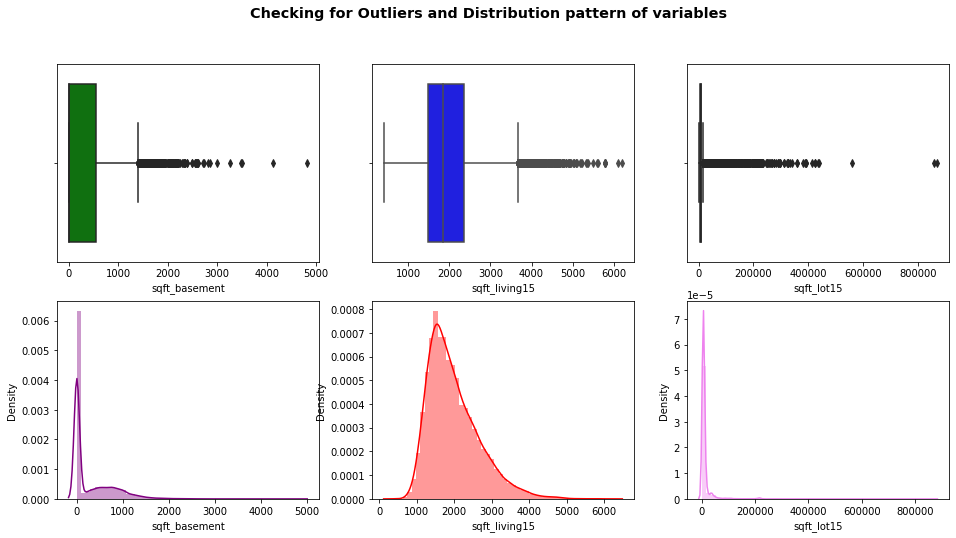

In [18]:
plt.figure(figsize = (16,8))
plt.suptitle("Checking for Outliers and Distribution pattern of variables", fontsize = 'x-large',weight = 'extra bold',ha = "center")
plt.subplot(2,3,1)
sns.boxplot(df1['sqft_basement'], color = 'green')
plt.subplot(2,3,2)
sns.boxplot(df1['sqft_living15'], color = 'blue')
plt.subplot(2,3,3)
sns.boxplot(df1['sqft_lot15'], color = 'purple')
plt.subplot(2,3,4)
sns.distplot(df1['sqft_basement'], color = 'purple')
plt.subplot(2,3,5)
sns.distplot(df1['sqft_living15'], color = 'red')
plt.subplot(2,3,6)
sns.distplot(df1['sqft_lot15'], color = 'violet')
plt.show()

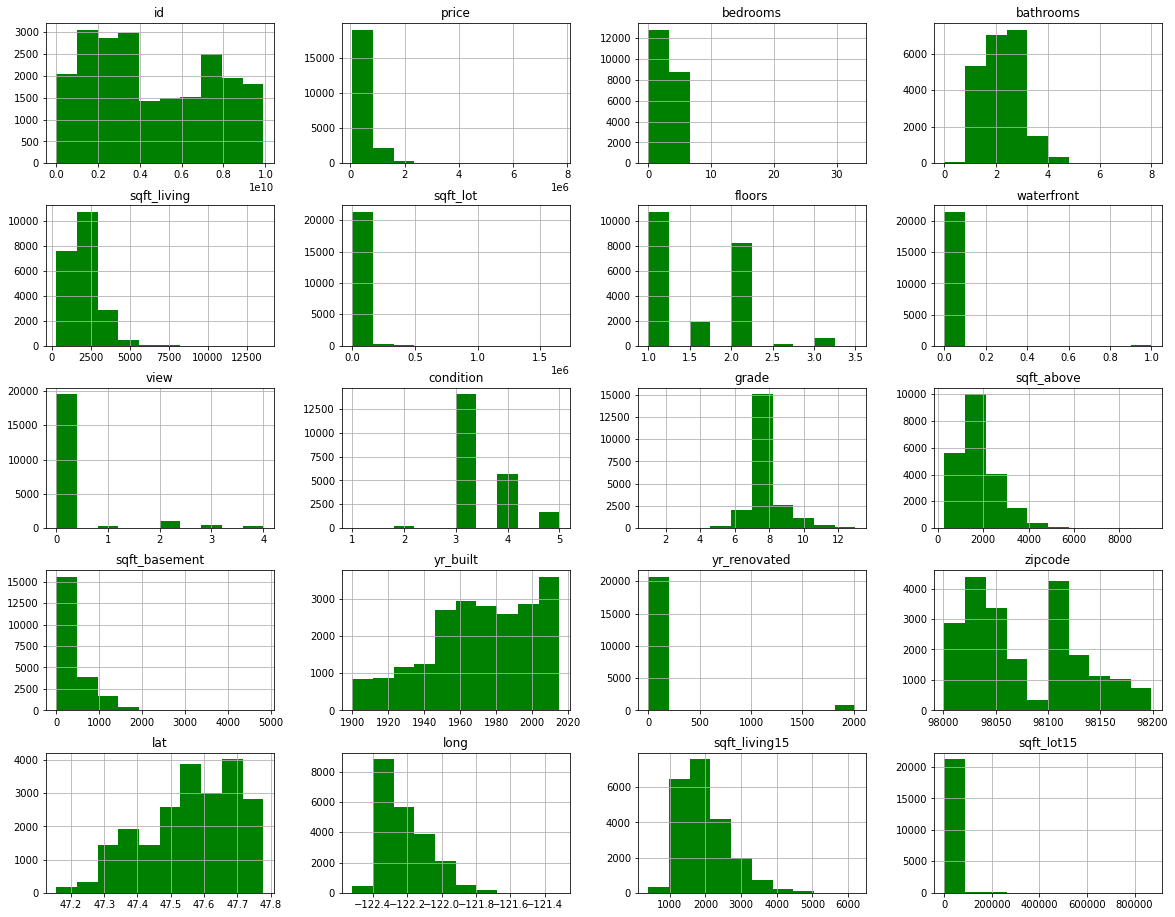

In [19]:
df.hist(figsize=(20,16), color = "green")
plt.show()

<AxesSubplot:>

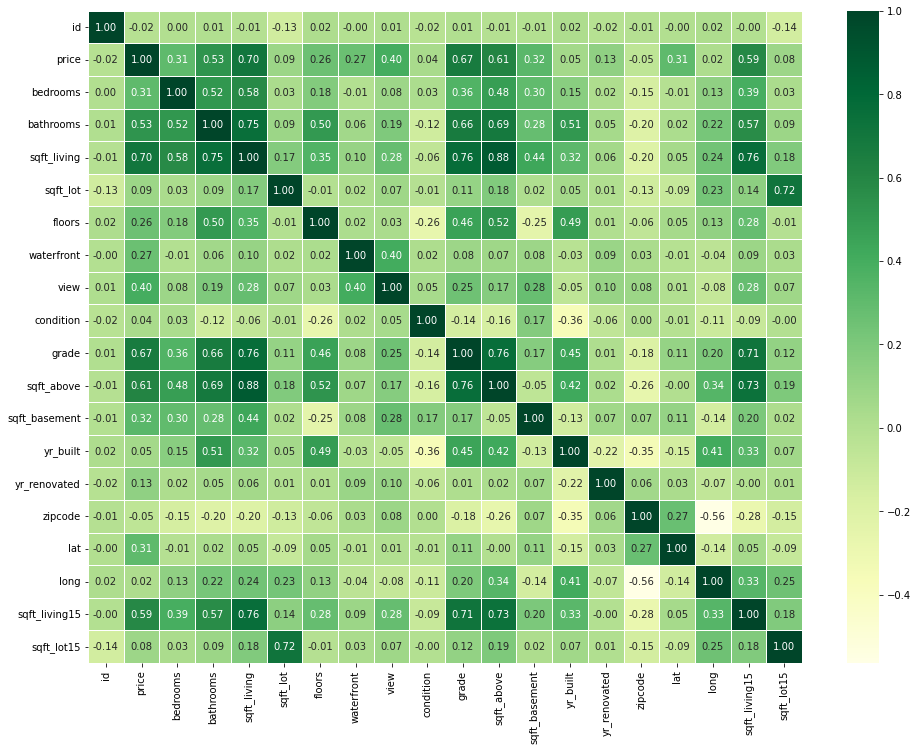

In [20]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True, cmap="YlGn", linewidths=.5, fmt='.2f', annot_kws={'size':10})

<p style="background-color:lightpink;font-family:newtimeroman;font-size:20px;line-height:1.7em;text-align:center;border-radius:5px 5px">Train Test Split</p>

In [21]:
x = df1.drop('price', axis = 1)
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,1,0.00,670,43377,1.0,0,0,3,3,670,0,1160,42882
1,2,1.00,780,16344,1.0,0,0,1,5,780,0,1700,10387
2,1,0.75,430,5050,1.0,0,0,2,4,430,0,1200,7500
3,2,1.00,730,9975,1.0,0,0,1,5,730,0,860,9000
4,3,1.00,860,10426,1.0,0,0,3,6,860,0,1140,11250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,4600,21750
21609,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,3560,24345
21610,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,4540,42730
21611,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,3930,25449


In [22]:
y = df1["price"]
y

0          75000.0
1          78000.0
2          80000.0
3          81000.0
4          82000.0
           ...    
21608    5350000.0
21609    5570000.0
21610    6885000.0
21611    7062500.0
21612    7700000.0
Name: price, Length: 21613, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,shuffle = True,test_size=0.20)

In [25]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((17290, 13), (4323, 13), (17290,), (4323,))

<p style="background-color:lightpink;font-family:newtimeroman;font-size:20px;line-height:1.7em;text-align:center;border-radius:5px 5px">ANN Model Building</p>

In [26]:
from keras import Sequential
from keras.layers.normalization import layer_normalization
from keras.layers import Dense

In [27]:
ann = Sequential()

In [28]:
ann.add(Dense(units = 13, kernel_initializer = 'random_uniform', activation = 'relu', input_dim = x_train.shape[1]))
ann.add(Dense(units = 7, kernel_initializer = 'random_uniform', activation = 'relu'))
ann.add(Dense(units = 4, kernel_initializer = 'random_uniform', activation = 'relu'))
ann.add(Dense(units = 2, kernel_initializer = 'random_uniform', activation = 'relu'))

In [29]:
ann.add(Dense(units = 1, kernel_initializer = 'random_uniform', activation = 'relu'))

In [30]:
ann.compile(loss = ['mean_squared_error'], optimizer = 'adam')

In [31]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                182       
                                                                 
 dense_1 (Dense)             (None, 7)                 98        
                                                                 
 dense_2 (Dense)             (None, 4)                 32        
                                                                 
 dense_3 (Dense)             (None, 2)                 10        
                                                                 
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 325
Trainable params: 325
Non-trainable params: 0
_________________________________________________________________


In [32]:
ann.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 500, batch_size = 500)

Epoch 1/500
35/35 [==============================] - 0s 5ms/step - loss: 427309957120.0000 - val_loss: 423108509696.0000
Epoch 2/500
35/35 [==============================] - 0s 2ms/step - loss: 427270340608.0000 - val_loss: 422984810496.0000
Epoch 3/500
35/35 [==============================] - 0s 2ms/step - loss: 426755325952.0000 - val_loss: 421718523904.0000
Epoch 4/500
35/35 [==============================] - 0s 2ms/step - loss: 423199277056.0000 - val_loss: 414845304832.0000
Epoch 5/500
35/35 [==============================] - 0s 2ms/step - loss: 408970493952.0000 - val_loss: 392670838784.0000
Epoch 6/500
35/35 [==============================] - 0s 2ms/step - loss: 376244371456.0000 - val_loss: 355242704896.0000
Epoch 7/500
35/35 [==============================] - 0s 2ms/step - loss: 345511526400.0000 - val_loss: 337527570432.0000
Epoch 8/500
35/35 [==============================] - 0s 2ms/step - loss: 336185229312.0000 - val_loss: 331063885824.0000
Epoch 9/500
35/35 [=============

In [33]:
y_pred = ann.predict(x_test)

In [34]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))

Mean Absolute Error: 162805.26361540018
Mean Squared Error: 64953983376.761284
Root Mean Squared Error: 254860.71367859206
Mean Absolute Percentage Error: 0.3468958417243066


In [37]:
from math import sqrt
sqrt(65898094592.0000)

256706.24182516482

In [36]:
df_testY = pd.DataFrame(y_test)
df_y_pred = pd.DataFrame(y_pred)

df_testY.reset_index(drop=True, inplace=True)
df_y_pred.reset_index(drop=True, inplace=True)

df_results = pd.concat([df_testY, df_y_pred], axis=1)
df_results.columns = ['Actual', 'Predicted']

df_results

,Actual,Predicted
0,198000.0,5.211347e+05
1,260000.0,3.909862e+05
2,291000.0,4.877560e+05
3,645000.0,3.414933e+05
4,970000.0,1.195715e+06
...,...,...
4318,540000.0,6.384061e+05
4319,1088000.0,1.054290e+06
4320,400000.0,4.870173e+05
4321,435000.0,2.729889e+05


<p style="background-color:lightpink;font-family:newtimeroman;font-size:20px;line-height:1.7em;text-align:center;border-radius:5px 5px">Real Time Prediction</p>

In [40]:
ann.predict([[3,1.00,860,10426,1.0,0,0,3,6,860,0,1140,11250]])

array([[225001.44]], dtype=float32)

<p style="background-color:lightpink;font-family:newtimeroman;font-size:20px;line-height:1.7em;text-align:center;border-radius:5px 5px">Conclusion</p>

- For more better result we can perform following operations onthe data :
      
      1. Imputing missing values with appropriate mean, median, mode ( If only Missing values Present )
      
      2. Capping outliers
      
      3. Scaling the data  [ Feature Scalling ]
      
      4. Selecting Best features [ Feature Selection ]
      
      5. Hyperparameters Tuning.

___Thank You___